# **Tarefa 3**: Álgebra Linear e Otimização para ML -  MO431A
Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Prof. Jacques Wainer, 2021s1

In [1]:
# RA & Name
print('265673: ' + 'Gabriel Luciano Gomes')
print('192880: ' + 'Lucas Borges Rondon')
print('265674: ' + 'Paulo Júnio Reis Rodrigues')

265673: Gabriel Luciano Gomes
192880: Lucas Borges Rondon
265674: Paulo Júnio Reis Rodrigues


## Imports necessários

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize, line_search, minimize_scalar
import pybobyqa

## Variáveis Globais

In [3]:
func_execution = 0
grad_execution = 0

## Função de Himmelblau

In [4]:
def himmelblau(x):
    global func_execution
    func_execution += 1
    return sum((x[:-1]**2 + x[1:] - 11)**2 + (x[:-1] + x[1:]**2 - 7)**2)

### Gradiente de Himmelblau

In [5]:
def grad_himmelblau(x):
    global grad_execution
    grad_execution += 1
    return np.array([sum(4 * x[:-1] * (x[:-1]**2 + x[1:] - 11) + 2*(x[:-1] + x[1:]**2 - 7)),
                     sum(2 * (x[:-1]**2 + x[1:] - 11) + 4 * x[1:] * (x[:-1] + x[1:]**2 - 7) )])

### Formato da função

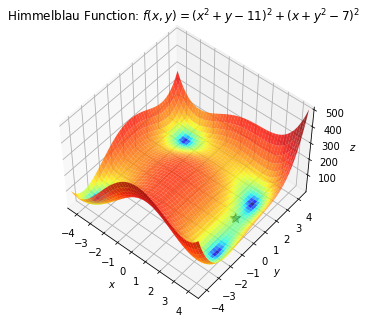

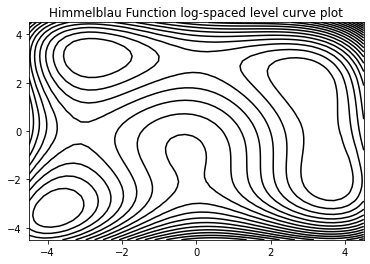

In [6]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

fx = lambda x, y : (x**2 + y - 11)**2 + (x + y**2 - 7)**2

z = fx(x, y)

minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

plt.title(r'Himmelblau Function: $f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$')

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, fx(*minima_), 'k*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

plt.title('Himmelblau Function log-spaced level curve plot')
plt.contour(x, y, z, 20, colors='black');

### Exibir Resultados

In [7]:
def showResults(min_point, fx, f_steps, g_steps, execution_time):
    print(f'Minimum point: {min_point} \n' + 
          f'f(x) at the minimum point: {fx} \n' +
          f'Took {f_steps} function calls and {g_steps} gradient calls \n'
          f'And {execution_time} seconds to execute')

## Conjugado gradiente

In [8]:
# Starting point
x0 = np.array([4.0, 4.0])

start_time = time.time()

# Call CG
res = minimize(himmelblau, x0,  method='CG', jac = grad_himmelblau)

end_time = time.time()

### Resultados

In [9]:
showResults(res.x, res.fun, func_execution, grad_execution, (end_time - start_time))

Minimum point: [3. 2.] 
f(x) at the minimum point: 8.491206913057949e-21 
Took 17 function calls and 17 gradient calls 
And 0.006002902984619141 seconds to execute


## Descida do gradiente com busca em linha

In [10]:
# Reseting global variables
func_execution = 0
grad_execution = 0

# Starting point
x0 = np.array([4.0, 4.0])

# Store ith point
xi = x0

tol = 1 

start_time = time.time()

while (tol > 10**-5):
    # Compute himmelblau to point xi
    f_old = himmelblau(xi)

    # Compute grad dicrection
    grad_direction = -grad_himmelblau(xi)    
    
    # Call Line_search function
    res = line_search(himmelblau, grad_himmelblau, xi, grad_direction)

    # Compute point xi+1
    x_new = xi + res[0]*grad_direction

    # Compute himmelblau to point xi+1
    f_new = himmelblau(x_new)
    
    # Verify tolerance
    tol = abs(f_new - f_old)
    
    if(tol < 10**-5):
        break
        
    # Store xi+1 point since tolerance is acceptable    
    xi = x_new

end_time = time.time()

### Resultados

In [11]:
showResults(xi, res[3], func_execution, grad_execution, (end_time - start_time))

Minimum point: [-3.77944783 -3.28281256] 
f(x) at the minimum point: 4.324482604942087e-07 
Took 98 function calls and 33 gradient calls 
And 0.01299595832824707 seconds to execute


## Nelder-Mead

In [12]:
# Starting point
x0 = [[-4, -4], [-4, 1], [4, -1]]

start_time = time.time()

res = minimize(himmelblau, [4, 4],  method='Nelder-Mead', options={'initial_simplex': x0})

end_time = time.time()

### Resultados

In [13]:
showResults(res.x, res.fun, res.nfev, res.nit, (end_time - start_time))

Minimum point: [ 3.58441449 -1.84811588] 
f(x) at the minimum point: 1.0686566996168641e-08 
Took 77 function calls and 40 gradient calls 
And 0.005001544952392578 seconds to execute


## BFGS (L-BFGS-B)

In [14]:
# Reseting global variables
func_execution = 0
grad_execution = 0

# Starting point
x0 = np.array([4.0, 4.0])

start_time = time.time()

# Call L-BFGS-B
res = minimize(himmelblau, x0,  method='L-BFGS-B', jac = grad_himmelblau)

end_time = time.time()

### Resultados

In [15]:
showResults(res.x, res.fun, func_execution, grad_execution, (end_time - start_time))

Minimum point: [2.99999986 2.00000019] 
f(x) at the minimum point: 8.287611056879445e-13 
Took 10 function calls and 10 gradient calls 
And 0.00600743293762207 seconds to execute


## BOBYQA

In [16]:
# Reseting global variables
func_execution = 0
grad_execution = 0

# Starting point
x0 = np.array([4.0, 4.0])

start_time = time.time()

# Call Py-BOBYQA
res = pybobyqa.solve(himmelblau, x0)

end_time = time.time()

### Resultados

In [17]:
showResults(res.x, res.f, func_execution, grad_execution, (end_time - start_time))

Minimum point: [3. 2.] 
f(x) at the minimum point: 1.287703554675167e-21 
Took 58 function calls and 0 gradient calls 
And 0.15995359420776367 seconds to execute


## Conclusões

A função Himmelblau possui quatro pontos mínimos, sendo eles: [3,2], [-2,8051, 3.1313], [-3,7793, -3,2831] e [3.5844, -1,8481]. Portanto, os algoritmos devem encontrar, no melhor caso, resultados o mais próximo possível desses citados.

Antes de averiguar os resultados, todos os valores default dos métodos foram utilizados. Entretanto, para o método de Busca em linha (Linear Search), foi utilizado uma tolerância de 1e-5 (f(x_new) - f(x_old)) como método de parada, uma vez que o algoritmo executa apenas uma vez e é necessário realizar um loop até a convergência dos valores. 

Após executar os algoritmos, pode-se observar que, de modo geral, todos encontram um dos pontos de mínimo da função Himmelblau sem divergências. Tendo isso em vista, é possível classificar os métodos de acordo com o tempo de execução e quantidade de chamadas à funções e gradiente. A seguir, encontra-se o ranking das execuções.


1º - BFGS (L-BFGS-B)
Este foi o melhor método, uma vez que executou no menor tempo (2 ms) e realizou a menor quantidade computacional (10 chamadas de função e 10 chamadas de gradiente), para encontrar um dos pontos de mínimo.

2º - Nelder-Mead
Ocupando o segundo lugar, este método apesar de ter um número maior de execuções (77 chamadas de função e 40 chamadas de gradiente), encontrou um dos pontos mínimos com apenas 3 ms.

3º - Conjugado Gradiente
Este método só fica atrás do Nelder-Mead devido o tempo de execução (6 ms) para computar um dos pontos mínimos, com 17 chamadas de função e 17 chamadas de gradiente.

4º - Line-Search
Este método se equipara ao conjugado gradiente no tempo de execução (6 ms) para identificação do ponto mínimo. Entretanto, possui maior gasto computacional (98 chamadas de função e 33 chamadas de gradiente).

5º BOBYQA
O método BOBYQA ocupa a última colocação devido extritamente ao tempo de execução. Dentre os modelos analisados, levou cerca de 100 ms para execução e 58 chamadas de função. Tendo em vista que, a função não utiliza (ou é possível inferir) função gradiente durante o processo.